## Daily Data

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/monetary_data_v2.xlsx', sheet_name=2)

In [3]:
df.Date = df.Date.apply(pd.to_datetime)

In [4]:
df.set_index('Date', inplace=True)

## Weekly Data

In [21]:
df_weekly = pd.read_excel('/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/monetary_data_v2.xlsx', sheet_name=1)

In [22]:
df_weekly = df_weekly.T

In [23]:
new_header = df_weekly.iloc[0]
df_weekly = df_weekly[1:]
df_weekly.columns = new_header

In [24]:
df_weekly.reset_index(inplace=True)

In [29]:
df_weekly['index'] = df_weekly['index'].apply(pd.to_datetime)

In [31]:
df_weekly.set_index('index', inplace=True)

## Monthly Data

In [46]:
df_monthly = pd.read_excel('/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/monetary_data_v2.xlsx', sheet_name=0)

In [47]:
df_monthly = df_monthly.T
new_header = df_monthly.iloc[0]
df_monthly = df_monthly[1:]
df_monthly.columns = new_header

In [48]:
df_monthly.Date = df_monthly.Date.apply(pd.to_datetime)

In [49]:
df_monthly.set_index('Date', inplace=True)

## Merge

In [42]:
df_merge = pd.merge(df, df_weekly, how='outer', left_index=True, right_index=True)

In [50]:
df_merge = pd.merge(df_merge, df_monthly, how='outer', left_index=True, right_index=True)

In [55]:
# df_merge.tail(50)

In [56]:
df_merge.to_csv('/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/merge.csv')

## Data viz

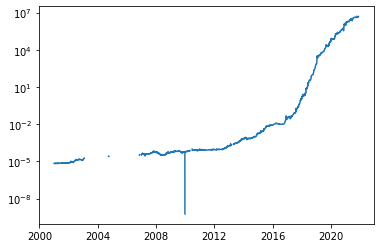

In [64]:
plt.plot(df_merge.Dolartoday)
plt.yscale('log')

